# Binary Digit Classifier

We have been offered a job at ML Solutions Limited to create a neural network classifier that can classify images of written binary digits (1 or 0).

In [225]:
import tensorflow as tf
import numpy as np

In [226]:
from tensorflow.keras.datasets import mnist

In [227]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [228]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

Now we want to take out the 1's and 0's from this dataset so that we can do classification on those. Here we are extracting the input data and their respective labels for those whose labeles have either 0 or 1.

In [229]:
x_train, y_train = x_train[(y_train==1) | (y_train==0)],y_train[(y_train==1) | (y_train==0)]

In [230]:
x_train.shape, y_train.shape

((12665, 28, 28), (12665,))

We do the same on the test data

In [231]:
# FILL IN HERE

# Do the same to the x_test and y_test
x_test, y_test = x_test[(y_test==1) | (y_test==0)],y_test[(y_test==1) | (y_test==0)]

In [232]:
x_test.shape, y_test.shape

((2115, 28, 28), (2115,))

Let us see what our data looks like. We will pick a random instance from the dataset and visualize it.

Label:  1


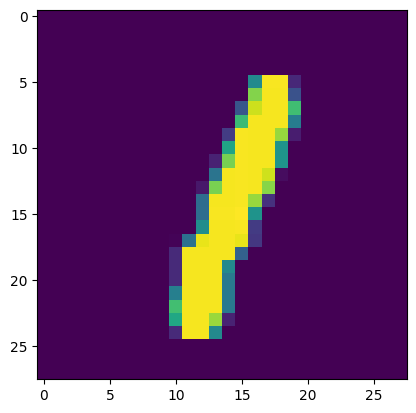

In [233]:
import random
import matplotlib.pyplot as plt
picked_idx = random.randint(0, x_train.shape[0]-1)

img_picked = x_train[picked_idx]
label = y_train[picked_idx]

plt.imshow(img_picked)
print('Label: ', label)


# Preprocessing

Before we are ready to train our predict whether an image is a 1 or a 0, we need to do some preprocessing on the data.

In [234]:
#FILL IN HERE

# Neural networks play better with small numbers. Images tend to have pixel values between 0 and 255.
# Rescale this to 0-1. Hint try dividing
# Do this to x_train and x_test
# Remember to store the output back into x_train and x_test
x_train = x_train // 120
x_test = x_test // 120

In [235]:
#FILL IN HERE
# Since you will be using a regular Dense neural network. The network expects your data to be flattened from 2D to 1D
# Rehsape the data from (N, 28, 28) to (N, 784) N represents number of images.
# Each image is 28x28, we want to chage that to one flat row with 784
x_test = x_test.reshape(x_test.shape[0], 784)
x_train = x_train.reshape(x_train.shape[0], 784)


In [236]:
x_train.shape,x_test.shape

((12665, 784), (2115, 784))

# Create Model

Create a neural network model using tensorflow with at least 1 hidden layer. The output layer must have 1 unit. Experiment with different number of layers and number of units in each layer. This is where your creativitiy as a machine learning engineer comes in to play.

In [237]:
# FILL IN HERE
# Ensure the output layer uses sigmoid for activation
# Finish the line below
model = tf.keras.models.Sequential([
                             tf.keras.layers.Flatten(input_shape=(784,)), 
                             tf.keras.layers.Dense(130, activation='relu'), 
                             tf.keras.layers.Dense(156, activation='relu'), 
                             tf.keras.layers.Dense(250, activation='relu'), 
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

c:\Users\beadl\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the model

In [238]:
# FILL IN HERE
# Ensure you use the binary cross entropy loss function and sgd for your optmizer
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Now to train the model. Store the ouput of model.fit in a vairable called history as we are going to use this to plot the train accuracy and loss. Try different values for batch size and epochs. The aim is to get the highest test accuaracy possible.

In [239]:
# FILL IN HERE
# Uncomment and finish the line below
history =  model.fit(x_train, y_train, epochs=10, batch_size=15)

Epoch 1/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.1376
Epoch 2/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9979 - loss: 0.0080
Epoch 3/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9986 - loss: 0.0056
Epoch 4/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9989 - loss: 0.0046
Epoch 5/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9983 - loss: 0.0057
Epoch 6/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9991 - loss: 0.0035
Epoch 7/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9998 - loss: 0.0017
Epoch 8/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9997 - loss: 0.0017
Epoch 9/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9993 - loss: 0.0029
Epoch 10/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0017


# Evalualtion

Let's look at the plot of loss and accuracy. You should see accuracy going up and loss going down.

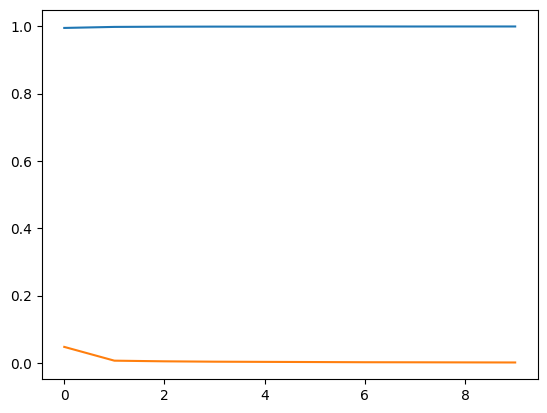

In [240]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

Let us evaluate our model. Remember in machine learning what we are most interested in is the accuracy on the test dataset as this data represents data that the model has not seen during training so it should test the model's ability to generalize to new data.

In [241]:
# Fill in here
# Call the evaluate function on x_test and y_test, store output in variable called out
# Finish line below
out = model.evaluate(x_test, y_test)
print('Accuracy {:.2f}%'.format(out[1]*100))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011     
Accuracy 99.95%


(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Label:  0
Predicited Label 0


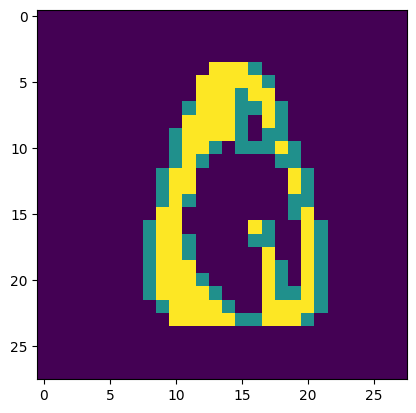

In [242]:
picked_idx = random.randint(0, x_test.shape[0]-1)

img_picked = x_test[picked_idx]
label = y_test[picked_idx]
print(img_picked.shape)
pred_label = model.predict(img_picked.reshape(1, -1))

plt.imshow(img_picked.reshape(28, 28))
print('Label: ', label)
print('Predicited Label', 1 if pred_label > 0.5 else 0)

# Logistic Regression Using SGD

$$\sigma (x) = \frac {1}{1 + e^{-x}}$$
$$y_{pred} = \sigma (W \cdot X^{T} + b)$$

In [243]:
#FILL IN
# N - batch size
# W - weight of shape (1, num_features)
# b - bias of shape (1,)
# X - matrix of shape (N, num_features)
# returns output of  ypred of shape (N,) **make sure to reshape**
# note you have to find the dot product of W and the transpose of X (look up how to do this using numpy)
def model_predict(W, b, X):

  def activation_fn(y):
    # return  sigmoid function applied to y
    # note there is a function called np.exp
   return 1 / (1 + np.exp(-y))
  
  return activation_fn(np.dot(W, (np.transpose(X))) + b)

$$L = -\frac{1}{N}\sum y_{target}log(y_{pred}) + (1-y_{target})log(1-y_{pred})$$

In [244]:
# FILL IN
# y_target - vector of targets of shape (N,)
# y_pred - vector of predictions of shape (N, )
# returns output of binary cross entropy loss function above
# **note you can find the mean using np.mean**
def loss_fn(y_target, y_pred):
    l = -np.mean(y_target * np.log(y_pred) + (1 - y_target) * np.log(1 - y_pred))
    return l


$$\frac{\partial{L}}{\partial{W}} = \frac{1}{N}(y_{pred}-y_{target})\cdot X$$
$$\frac{\partial{L}}{\partial{b}} = \frac{1}{N}\sum (y_{pred}-y_{target})$$

In [245]:
# FILL IN
# N - batch size
# y_pred - vector of predicitions of shape (N,)
# y_target - vector of targets of shape (N,)
# X - matrix of shape (N, num_features)
# returns dl_dw, dl_db - parital derivative of loss with respect to the weights, partial derivative of loss with respect
# to bias note you have to find the dot product
def gradient_calc(y_pred, y_target, X):
  N = len(X)
  dl_dw = (y_pred - y_target).dot(X) / y_pred.shape[0]
  dl_db = (y_pred - y_target).mean()
  return dl_dw, dl_db

# Gradient descent
$$ W = W - \alpha \frac{\partial L}{\partial W}$$
$$ b = b - \alpha \frac{\partial L}{\partial b}$$

In [246]:
# FILL IN
# W - weight of shape (1, num_features)
# b - bias of shape(1,)
# alpha - learning rate
# dl_dw - partial derivative of loss with respect to weight of shape (1, num_features)
# dl_db - partial derivative of loss with respect to bias (1,)
# returns W, b - updated weight and bias
def gradient_step(W, b, dl_dw, dl_db, alpha=0.01):
  W = W - (alpha * dl_dw)
  b = b - (alpha * dl_db)
  return W, b

Initialize weight and bias

In [247]:
W = np.random.randn(1, 784)
b = np.zeros(1,)

In [248]:
num_epochs = 20 #iterations through the entire dataset
batch_size = 16
alpha = 0.001 # learning rate

In [249]:
losses = []
for i in range(num_epochs):
  num_batches = len(x_train)//batch_size # split into mini batches
  for j in range(num_batches):
    X = x_train[j*batch_size:(j+1)*batch_size]
    y_target = y_train[j*batch_size:(j+1)*batch_size]
    y_pred = model_predict(W, b, X)
    loss = loss_fn(y_target, y_pred)
    dl_dw, dl_db = gradient_calc(y_pred, y_target, X)
    W, b = gradient_step(W, b, dl_dw, dl_db, alpha)
  losses.append(loss)
  print('Epoch: ', i, ' Loss: ', loss)

C:\Users\beadl\AppData\Local\Temp\ipykernel_36624\2322138607.py:7: RuntimeWarning: divide by zero encountered in log
  l = -np.mean(y_target * np.log(y_pred) + (1 - y_target) * np.log(1 - y_pred))
C:\Users\beadl\AppData\Local\Temp\ipykernel_36624\2322138607.py:7: RuntimeWarning: invalid value encountered in multiply
  l = -np.mean(y_target * np.log(y_pred) + (1 - y_target) * np.log(1 - y_pred))


Epoch:  0  Loss:  0.27588004153424284
Epoch:  1  Loss:  0.08159934406961734
Epoch:  2  Loss:  0.02218820115838619
Epoch:  3  Loss:  0.007398380681546943
Epoch:  4  Loss:  0.003595571460493184
Epoch:  5  Loss:  0.002397509605586438
Epoch:  6  Loss:  0.0019676717340978223
Epoch:  7  Loss:  0.0018027660448988617
Epoch:  8  Loss:  0.0017385708777396974
Epoch:  9  Loss:  0.0017099728340297425
Epoch:  10  Loss:  0.0016842126705205727
Epoch:  11  Loss:  0.0016495859534268386
Epoch:  12  Loss:  0.0016088148947836095
Epoch:  13  Loss:  0.0015668869704498828
Epoch:  14  Loss:  0.0015249642069127308
Epoch:  15  Loss:  0.0014809865654842114
Epoch:  16  Loss:  0.0014319533021476137
Epoch:  17  Loss:  0.0013762471009292317
Epoch:  18  Loss:  0.0013145162720217148
Epoch:  19  Loss:  0.0012488421201114004


Let us now plot the loss

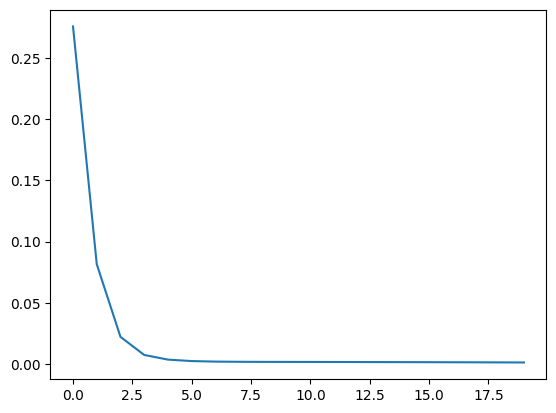

In [250]:
plt.plot(losses)

# Evaluation/Test

(784,)
Label:  1
Predicited Label 1


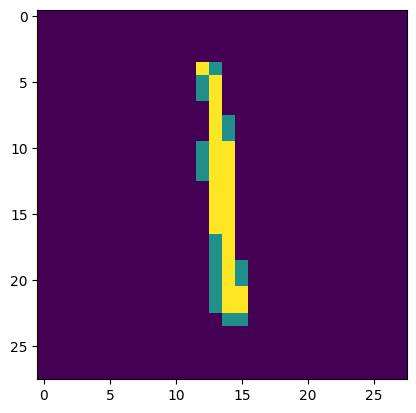

In [251]:
picked_idx = random.randint(0, x_test.shape[0]-1)

img_picked = x_test[picked_idx]
label = y_test[picked_idx]
print(img_picked.shape)
pred_label = model_predict(W, b, img_picked.reshape(1, -1))
plt.imshow(img_picked.reshape(28, 28))
print('Label: ', label)
print('Predicited Label', 1 if pred_label > 0.5 else 0)

Let us see how well your model did.

In [252]:
eval_pred = model_predict(W, b, x_test)
eval_pred = (eval_pred > 0.5).astype(float) # anything with more than 50% probability is seen as a 1
accuracy = np.mean((eval_pred == y_test).astype(float))
print('Accuracy: {:.2f}%'.format(float(accuracy*100)))

Accuracy: 99.57%


# Convolutional Neural Network

See if you can create a convolutional neural network to get even better accuracy.

In [253]:
cnnmodel = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.Dense(10, activation='sigmoid')
    ])

c:\Users\beadl\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [254]:
x_train1 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test1 = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train1.shape, x_test1.shape

((12665, 28, 28, 1), (2115, 28, 28, 1))

In [255]:
cnnmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [256]:
history = cnnmodel.fit(x_train1, y_train, epochs=10, validation_data=(x_test1, y_test))

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 0.9719 - loss: 0.1079 - val_accuracy: 0.9995 - val_loss: 5.4466e-04
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9986 - loss: 0.0043 - val_accuracy: 0.9995 - val_loss: 4.4909e-04
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9987 - loss: 0.0032 - val_accuracy: 0.9991 - val_loss: 0.0076
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 2.4721e-04
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 3.6509e-04 - val_accuracy: 0.9991 - val_loss: 0.0023
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 2.0388e-04 - val_accuracy: 0.9995 - val_loss: 5.1585e-04
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9985 - loss: 0.0038 - val_accuracy: 0.9991 - val_loss: 0.0028
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 

In [257]:
accuracy = cnnmodel.evaluate(x_test1, y_test)
print('Accuracy:', (accuracy[1]*100))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.1036e-05
Accuracy:  100.0


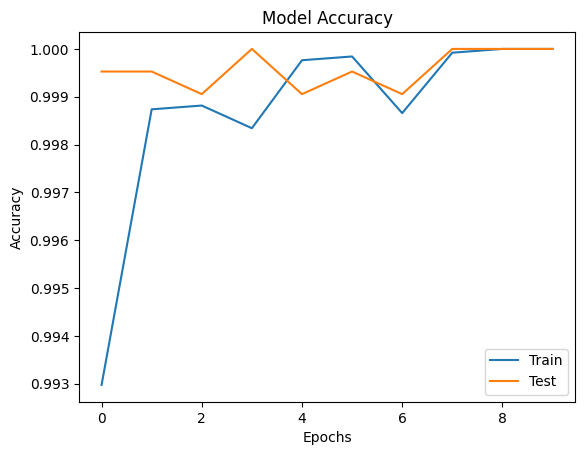

In [258]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

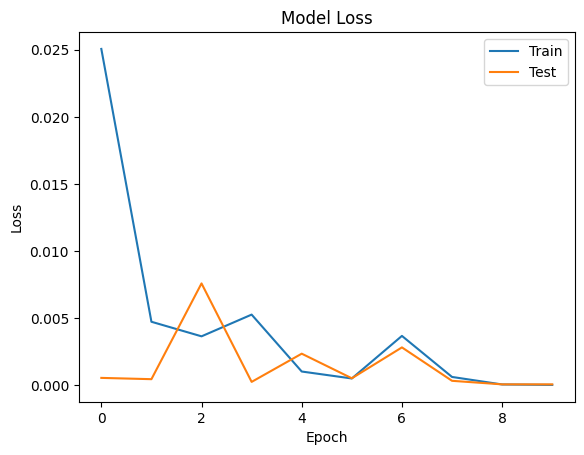

In [259]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [260]:
cnnmodel.evaluate(x_test1, y_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.1036e-05


[6.240110087674111e-05, 1.0]